In [1]:
import polars as pl
import statsmodels.api as sm


# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol'))).alias('return')
])

df = df.with_columns([
    ((pl.col('vwap') - pl.col('close'))).alias('vwap_close_diff')
])

df = df.with_columns([
    ((pl.col('vwap') + pl.col('close'))).alias('vwap_close_sum')
])

# 按日期和因子值排序并进行排名
df = df.with_columns([
    pl.col("vwap_close_diff").rank("dense").over("open_time").alias("rank_diff")
])

df = df.with_columns([
    pl.col("vwap_close_sum").rank("dense").over("open_time").alias("rank_sum")
])

df = df.with_columns([
    (pl.col('rank_diff') / pl.col('rank_sum')).alias('alpha042rank')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,vwap,return,vwap_close_diff,vwap_close_sum,rank_diff,rank_sum,alpha042rank
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64,f64,u32,u32,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",0.433554,null,-0.017446,0.884554,25,62,0.403226
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.444267,1.018182,-0.014933,0.903467,26,62,0.419355
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",0.457642,0.991943,0.002142,0.913142,80,62,1.290323
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",0.436542,0.943359,0.006842,0.866242,139,61,2.278689
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",0.427501,0.967186,0.011901,0.843101,99,61,1.622951
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.149566,1.001339,-0.000034,0.299166,76,49,1.55102
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.149601,1.0,0.000001,0.299201,82,49,1.673469
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",0.149411,0.995989,0.000411,0.298411,55,49,1.122449


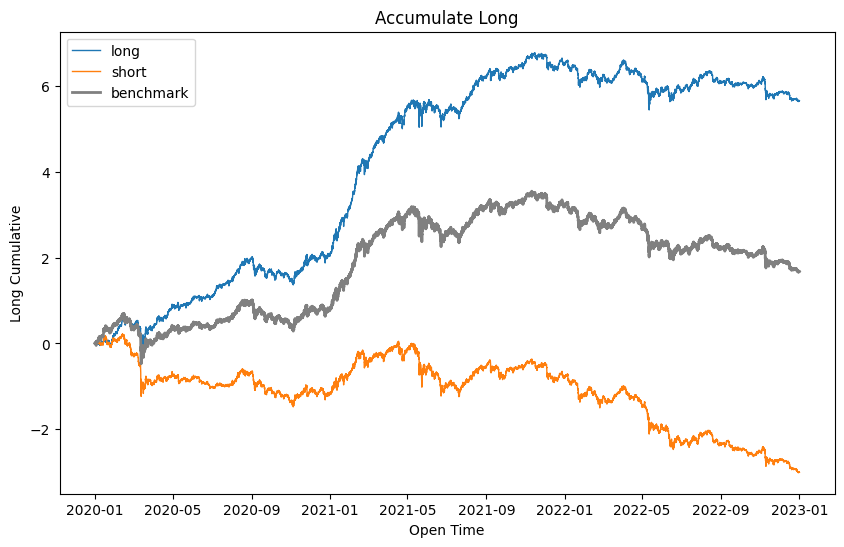

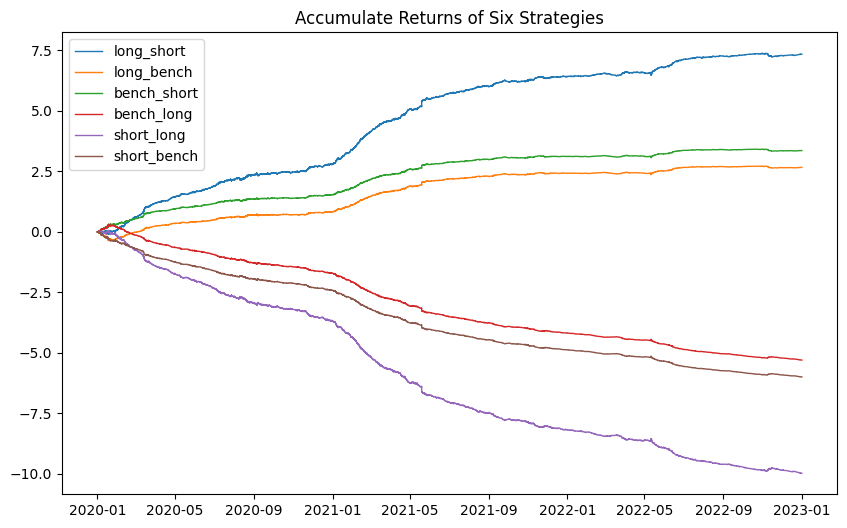

long: 
ann_return = 1.8832  sharpe = 1.6506  maxdd = 0.574  calmar_ratio = 3.2806  

short: 
ann_return = -1.0  sharpe = -0.949  maxdd = 2.6476  calmar_ratio = -0.3777  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 2.4452  sharpe = 7.7802  maxdd = 0.1596  calmar_ratio = 15.3178  

long_bench: 
ann_return = 0.8877  sharpe = 5.2219  maxdd = 0.3715  calmar_ratio = 2.3894  

bench_long: 
ann_return = -1.7637  sharpe = -10.375  maxdd = 4.2708  calmar_ratio = -0.413  

short_long: 
ann_return = -3.3212  sharpe = -10.5674  maxdd = 9.4595  calmar_ratio = -0.3511  

short_bench: 
ann_return = -1.9955  sharpe = -11.5824  maxdd = 5.8798  calmar_ratio = -0.3394  

bench_short: 
ann_return = 1.1195  sharpe = 6.498  maxdd = 0.0576  calmar_ratio = 19.4508  



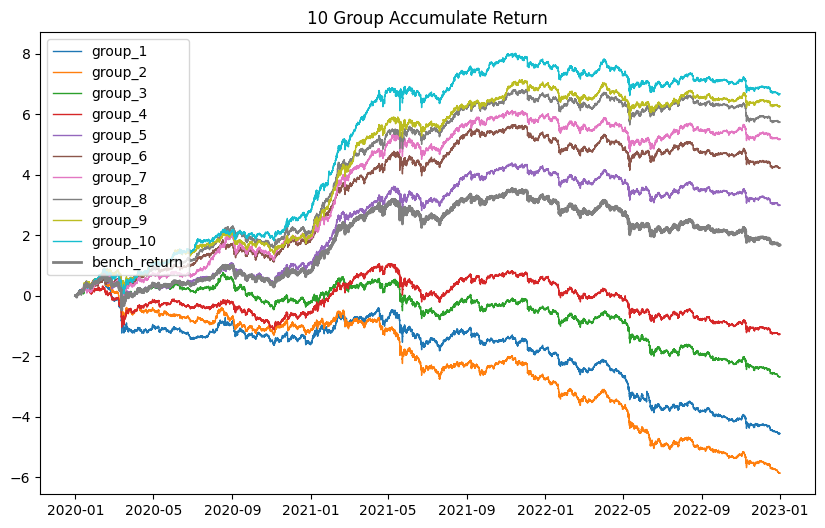

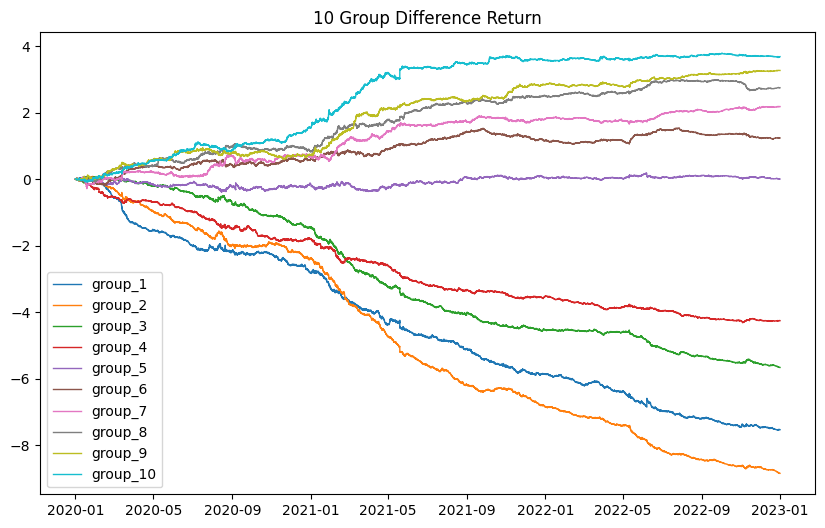

group_1: 
ann_return = -1.5144  sharpe = -1.3947  maxdd = 3.2082  calmar_ratio = -0.4721  

group_2: 
ann_return = -1.9513  sharpe = -1.7372  maxdd = 4.0247  calmar_ratio = -0.4848  

group_3: 
ann_return = -0.8923  sharpe = -0.8109  maxdd = 1.943  calmar_ratio = -0.4592  

group_4: 
ann_return = -0.4227  sharpe = -0.3869  maxdd = 1.1392  calmar_ratio = -0.3711  

group_5: 
ann_return = 0.9959  sharpe = 0.8941  maxdd = 0.5955  calmar_ratio = 1.6723  

group_6: 
ann_return = 1.4064  sharpe = 1.2082  maxdd = 0.5594  calmar_ratio = 2.514  

group_7: 
ann_return = 1.7211  sharpe = 1.4388  maxdd = 0.6678  calmar_ratio = 2.5775  

group_8: 
ann_return = 1.9093  sharpe = 1.6113  maxdd = 0.4849  calmar_ratio = 3.9373  

group_9: 
ann_return = 2.0827  sharpe = 1.7908  maxdd = 0.4112  calmar_ratio = 5.0648  

group_10: 
ann_return = 2.2207  sharpe = 1.8423  maxdd = 0.5581  calmar_ratio = 3.9793  

-----------------------------------------
group_difference_1: 
ann_return = -2.5099  sharpe = -5.71

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha042rank'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()